In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [28]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [29]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [30]:
species[species.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [31]:
species.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


In [32]:
observations['total'] = observations.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
observations.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
observations = observations[['scientific_name', 'park_name', 'total']]
observations = observations.rename(columns={'total': 'observations'})
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


In [33]:
observations = pd.merge(observations, species, left_on='scientific_name', right_on='scientific_name', how='left')
observations = observations[['scientific_name', 'park_name', 'observations', 'category', 'conservation_status']]

In [34]:
observations

,scientific_name,park_name,observations,category,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,NaN
...,...,...,...,...,...
22159,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,NaN
22160,Otospermophilus beecheyi,Bryce National Park,130,Mammal,NaN
22161,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,NaN
22162,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,NaN


In [35]:
observations.category.value_counts()

Vascular Plant       17048
Bird                  1952
Nonvascular Plant     1332
Mammal                 704
Fish                   500
Amphibian              316
Reptile                312
Name: category, dtype: int64

In [36]:
observations.park_name.value_counts()

Great Smoky Mountains National Park    5541
Yosemite National Park                 5541
Bryce National Park                    5541
Yellowstone National Park              5541
Name: park_name, dtype: int64

In [37]:
observations.conservation_status.value_counts()

Species of Concern    604
Endangered             60
Threatened             40
In Recovery            12
Name: conservation_status, dtype: int64

Text(0.5, 1.0, 'Number of observations by category')

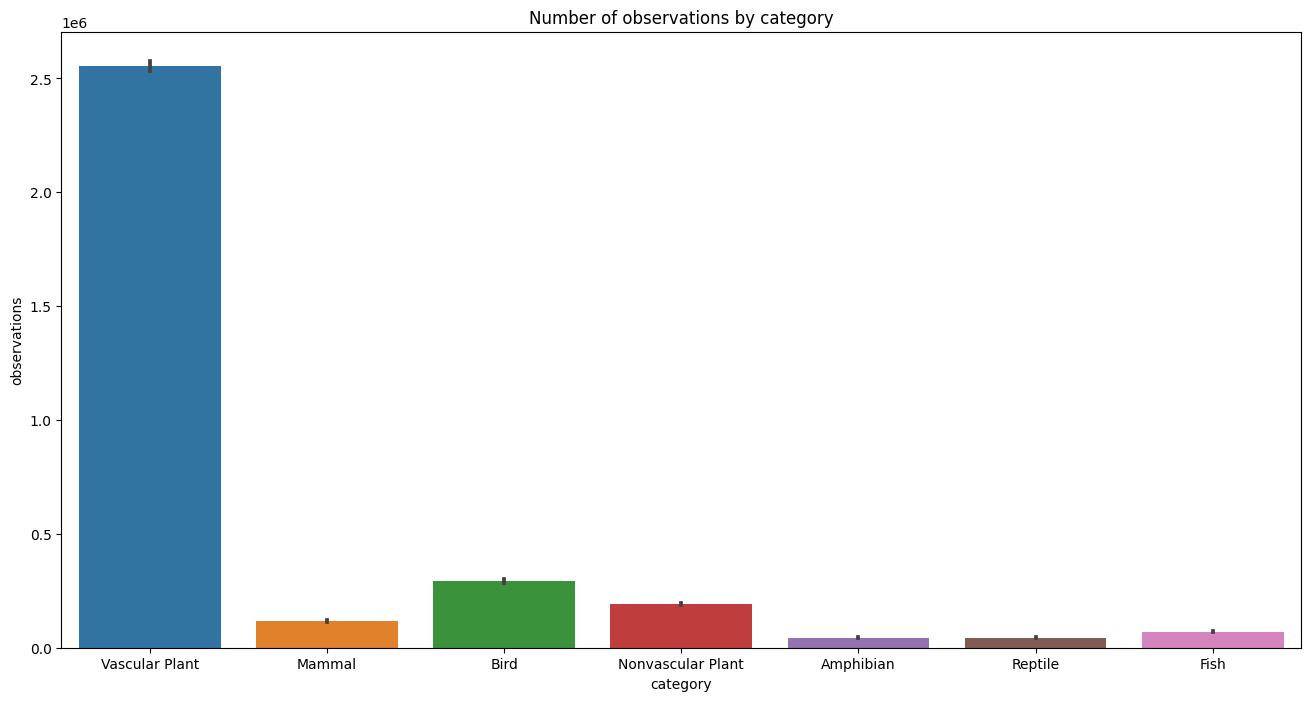

In [38]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='observations', data=observations, estimator=np.sum)
plt.title('Number of observations by category')

Text(0.5, 1.0, 'Number of observations for each categories by park')

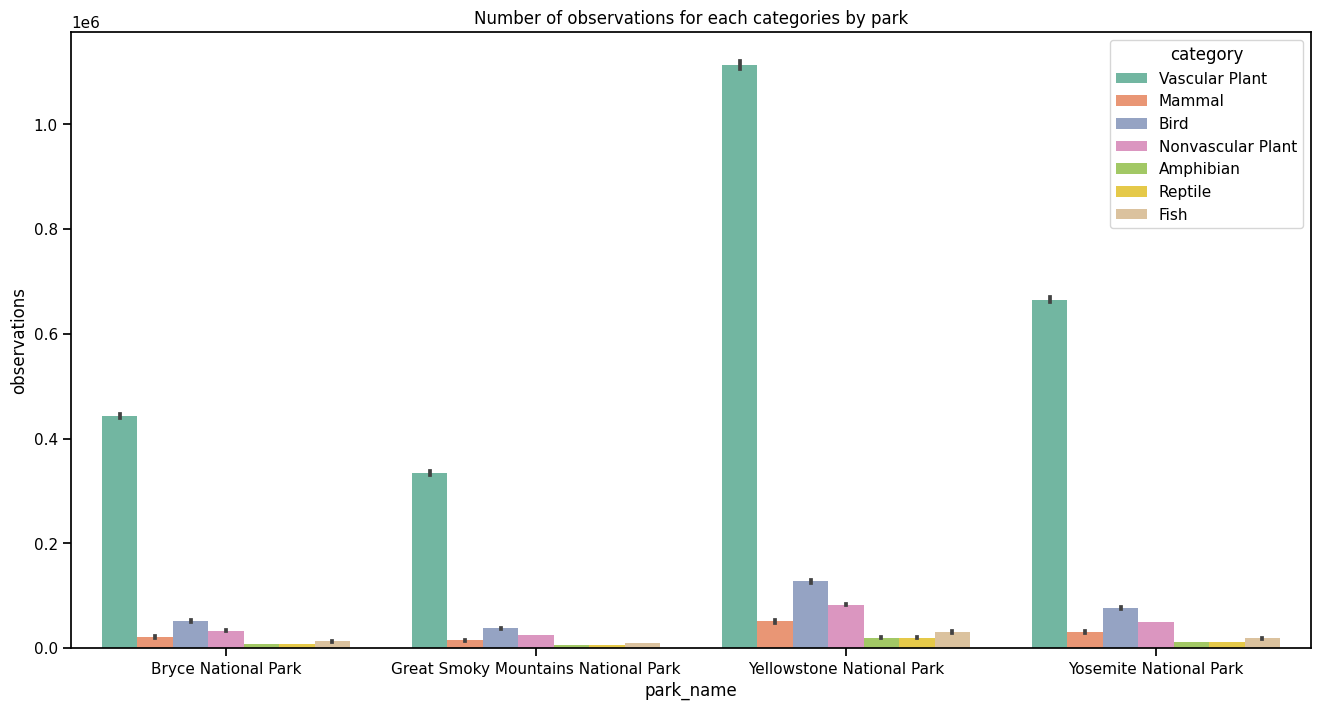

In [39]:
order = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']
sns.set_palette('Set2')
sns.set_context('notebook')
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='park_name', y='observations', data=observations, hue='category', estimator=np.sum, order=order)
plt.title('Number of observations for each categories by park')

Text(0.5, 1.0, 'Number of observations for each park by category')

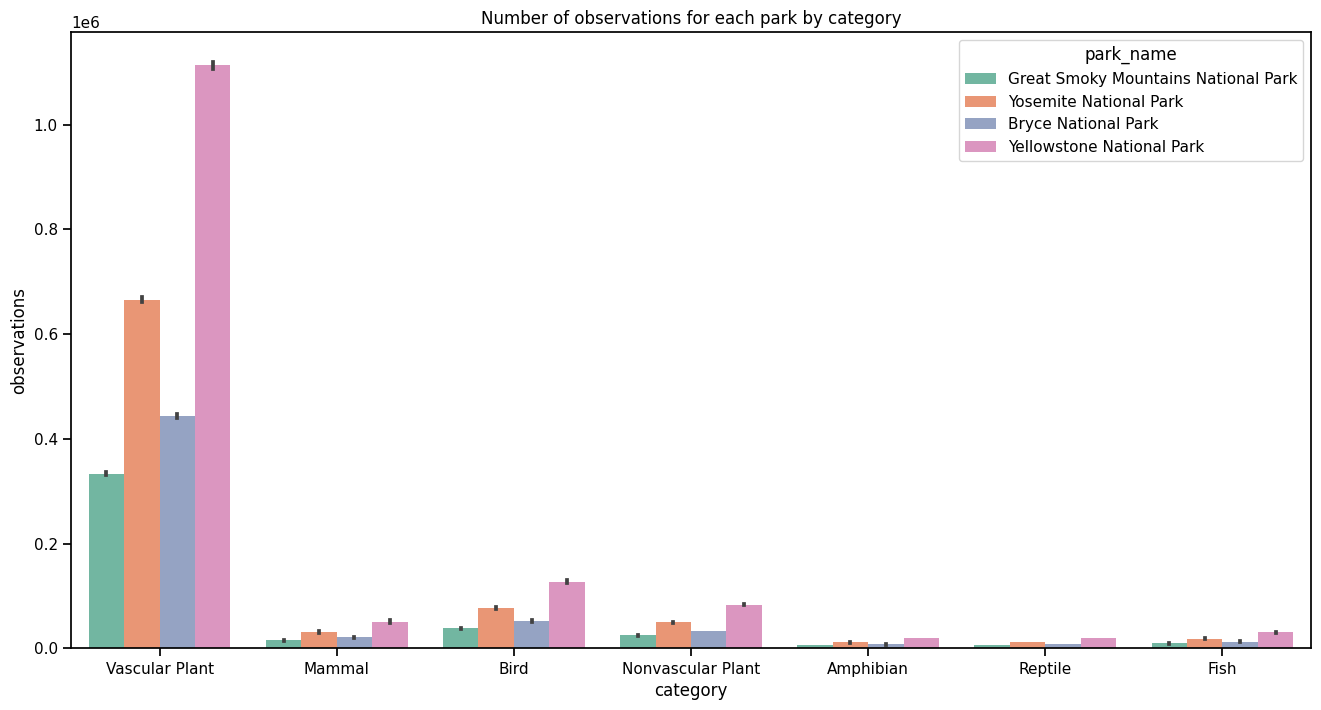

In [40]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='observations', data=observations, hue='park_name', estimator=np.sum)
plt.title('Number of observations for each park by category')

Text(0.5, 1.0, 'Number of observations for each conservation status by park')

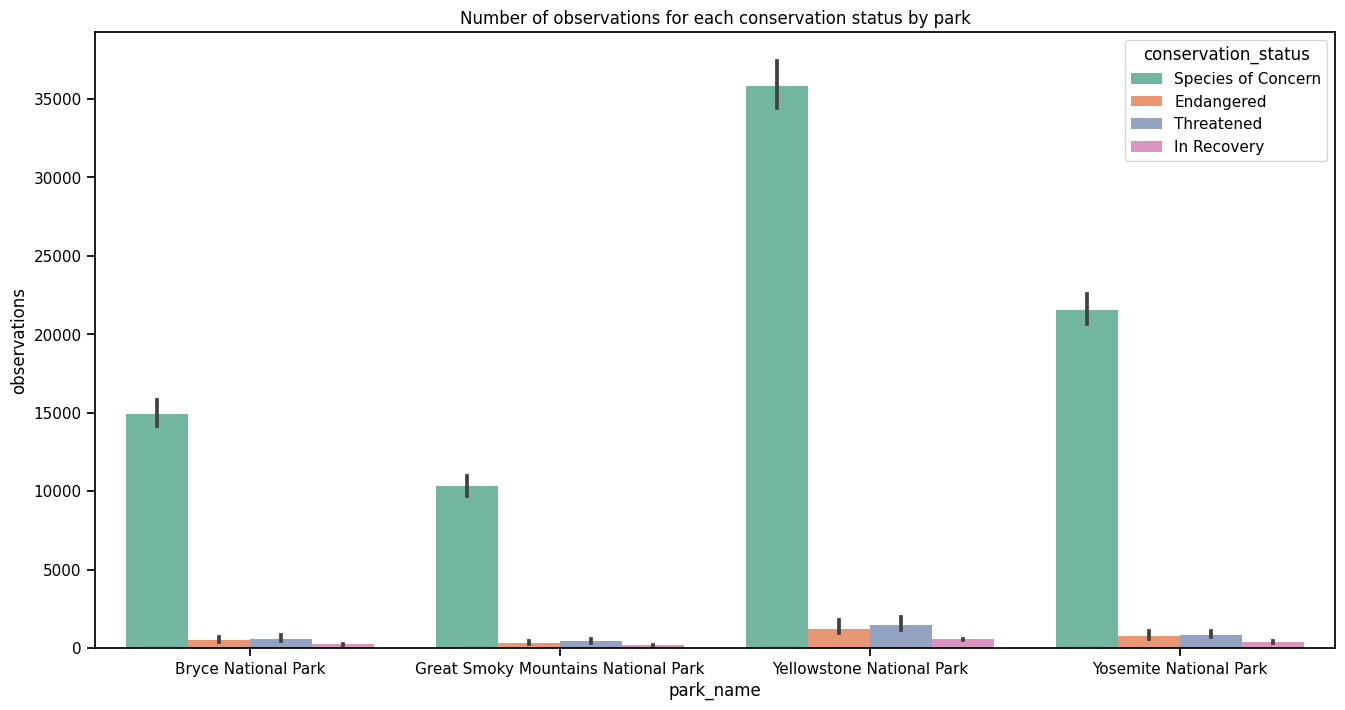

In [41]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='park_name', y='observations', data=observations, hue='conservation_status', estimator=np.sum, order=order)
plt.title('Number of observations for each conservation status by park')

Text(0.5, 1.0, 'Distribution of observations by conservation status')

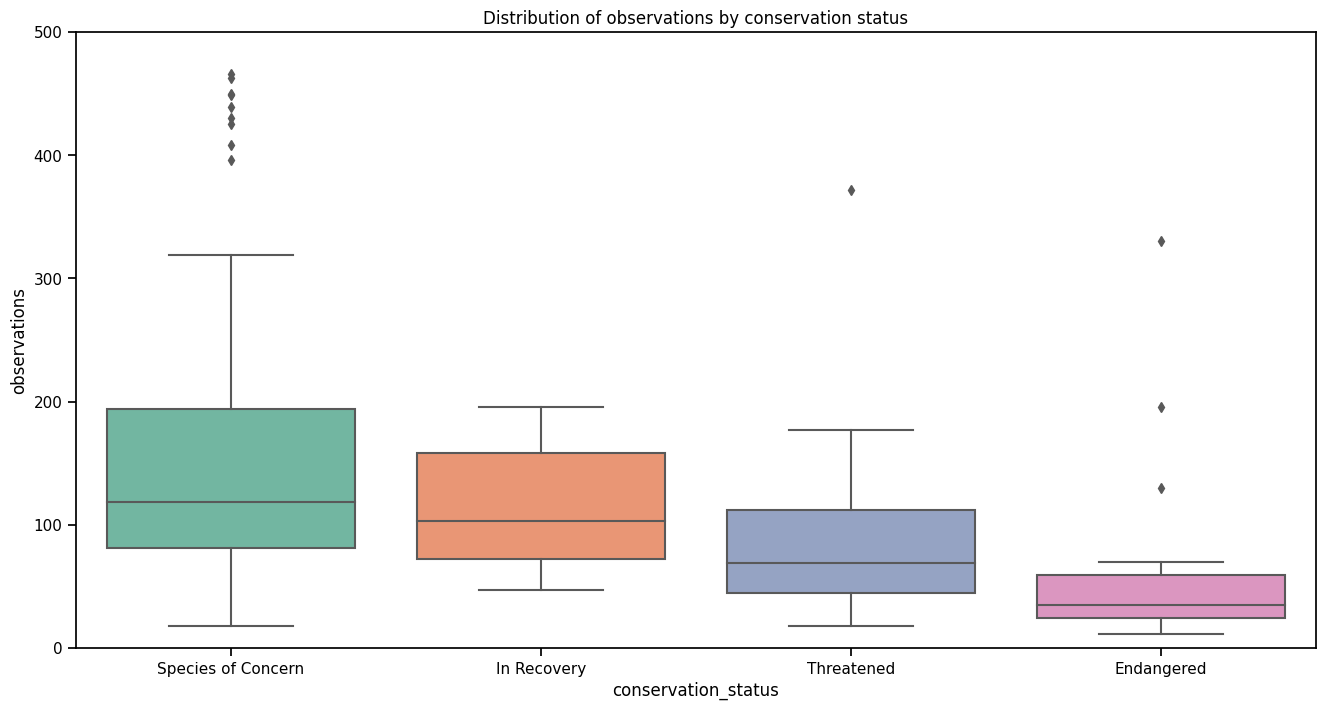

In [42]:
fig = plt.figure(figsize=(16, 8))
order = ['Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.boxplot(x='conservation_status', y='observations', data=observations, order=order)
plt.ylim(0, 500)
plt.title('Distribution of observations by conservation status')

In [43]:
under_protection = observations[observations.conservation_status.notna()].category.value_counts().reset_index()
under_protection = under_protection.rename(columns={'index': 'category', 'category': 'under protection'})
under_protection

,category,under protection
0,Bird,300
1,Vascular Plant,184
2,Mammal,120
3,Fish,44
4,Amphibian,28
5,Reptile,20
6,Nonvascular Plant,20


In [44]:
total_amount = observations.category.value_counts().reset_index().rename(columns={'index': 'category', 'category': 'total amount'})
under_protection = under_protection.merge(total_amount)
under_protection['proportion %'] = round(under_protection['under protection']/under_protection['total amount']*100, 2)
under_protection

,category,under protection,total amount,proportion %
0,Bird,300,1952,15.37
1,Vascular Plant,184,17048,1.08
2,Mammal,120,704,17.05
3,Fish,44,500,8.80
4,Amphibian,28,316,8.86
5,Reptile,20,312,6.41
6,Nonvascular Plant,20,1332,1.50


Text(0.5, 1.0, 'Number of protected species by category ')

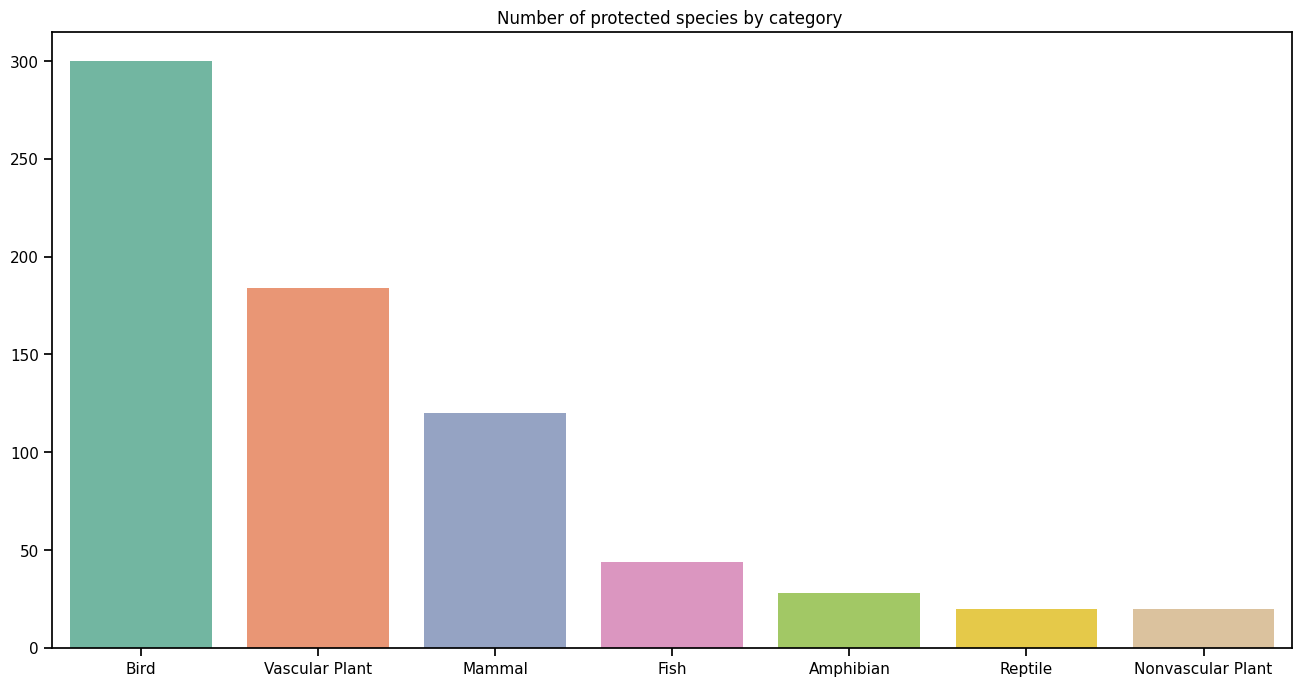

In [45]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='under protection', data=under_protection)
plt.xlabel('')
plt.ylabel('')
plt.title('Number of protected species by category ')

Text(0.5, 1.0, 'Proportions of protected species by category ')

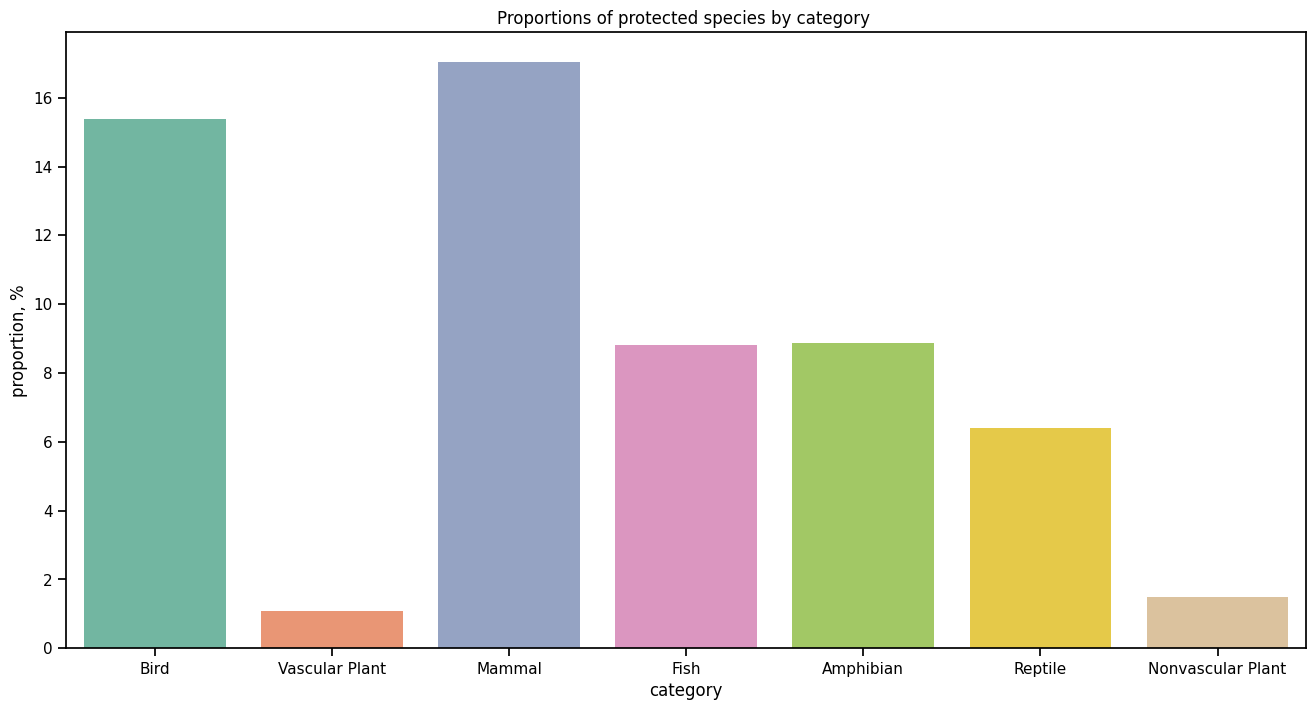

In [46]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='proportion %', data=under_protection)
plt.ylabel('proportion, %')
plt.title('Proportions of protected species by category ')

Text(0.5, 1.0, 'Distribution of categories by conservation status')

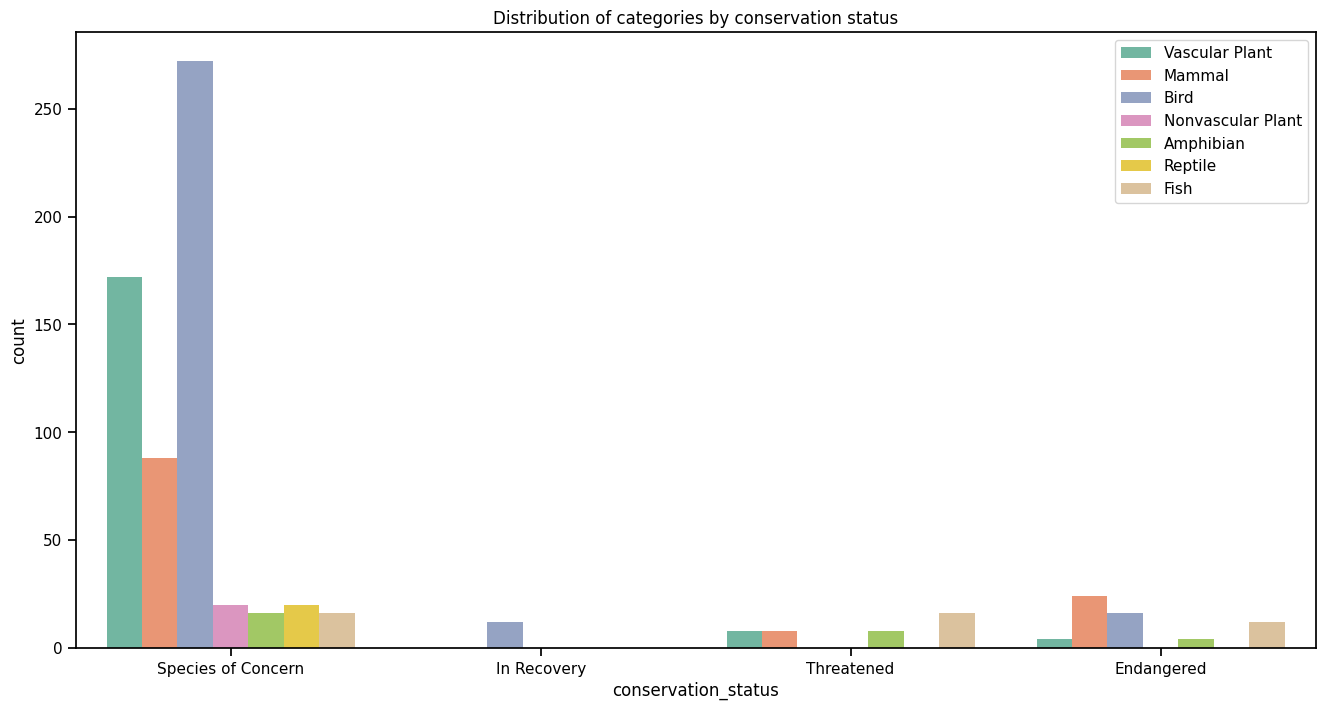

In [47]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(x='conservation_status', data=observations, hue='category', order=order)
plt.legend(loc='upper right')
plt.title('Distribution of categories by conservation status')

Text(0.5, 1.0, 'Number of species by conservation status by category')

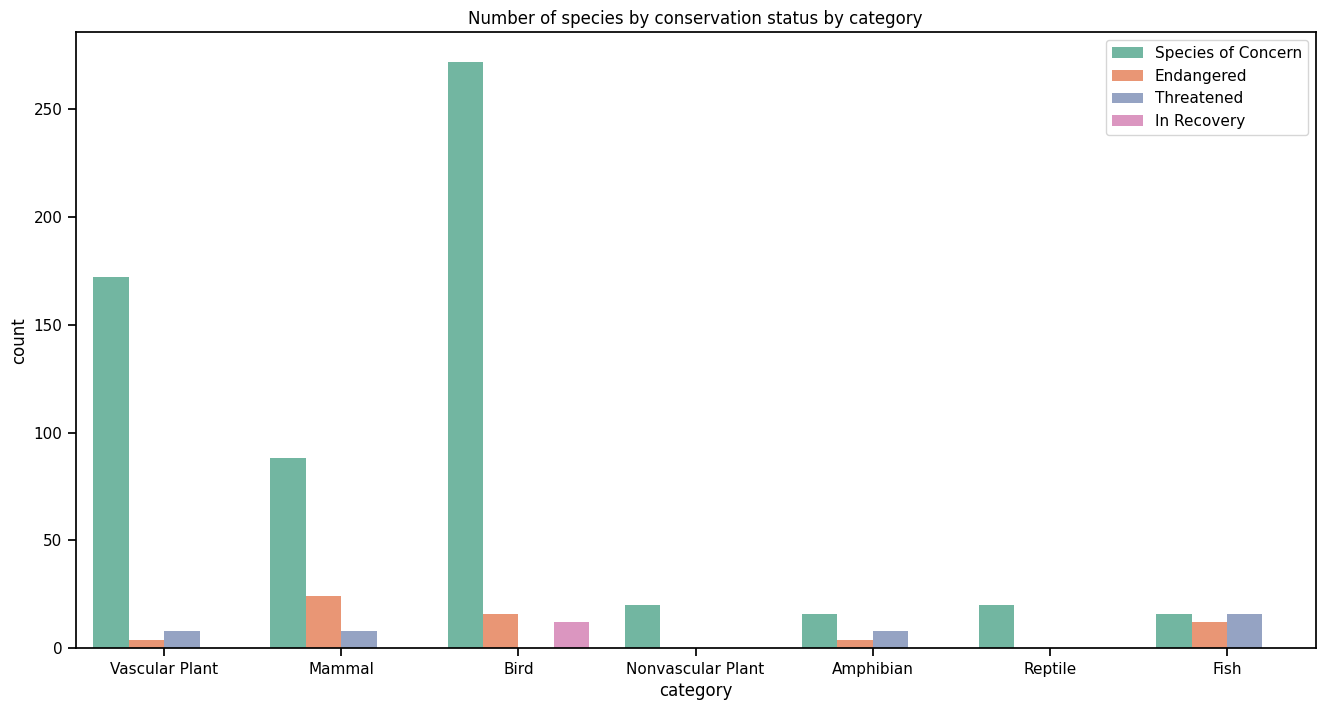

In [48]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(x='category', data=observations, hue='conservation_status')
plt.legend(loc='upper right')
plt.title('Number of species by conservation status by category')